# Dependencies

In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 8.0
import pandas as pd
import numpy as np
import seaborn as sns

from math import log

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import load_iris

# Read the CSV and Preform Basic Data Cleaning

In [2]:
gender_df = pd.read_csv("data/gender_submission.csv")
test_df1 = pd.read_csv("data/test.csv")
train_df = pd.read_csv("data/train.csv")

# Edit datasets
test_df2 = pd.read_csv("data/test.csv")
train_df2 = pd.read_csv("data/train.csv")

In [3]:
df1 = test_df1.count()
df1 = pd.DataFrame(df1).reset_index().rename(columns={"index":"fields", 0:"fields_value_count"})
df1

,fields,fields_value_count
0,PassengerId,418
1,Pclass,418
2,Name,418
3,Sex,418
4,Age,332
5,SibSp,418
6,Parch,418
7,Ticket,418
8,Fare,417
9,Cabin,91


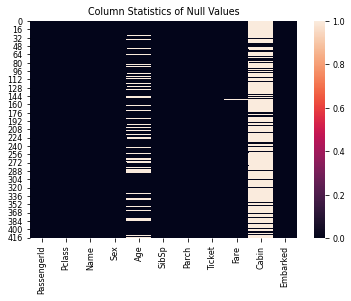

In [4]:
sns.heatmap(test_df1.isnull())
plt.title("Column Statistics of Null Values")
plt.savefig("resource/images/na_test_df_heatmap.png", bbox_inches='tight', pad_inches=0.5)

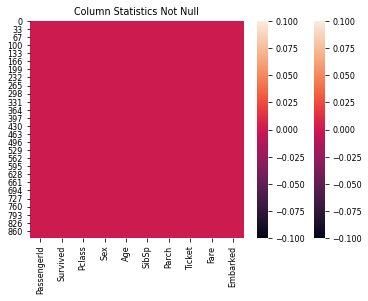

In [5]:
# Droping columns
test_df3 = test_df1.drop(['Cabin', 'Name'], axis=1)
train_df2 = train_df.drop(['Cabin', 'Name'], axis=1)

# Because Fare only account for one with Null, we filtering for all row not null. Easy peasy
test_df3 = test_df3[test_df3['Fare'].notna()]
train_df2 = train_df2[train_df2['Embarked'].notna()]

# Replaced null Age value with random number between the youngest and oldest age
test_df3['Age'] = test_df3['Age'].apply(lambda x: x if pd.notnull(x) else np.random.randint(test_df3['Age'].min(), test_df3['Age'].max()))
train_df2['Age'] = train_df2['Age'].apply(lambda x: x if pd.notnull(x) else np.random.randint(train_df2['Age'].min(), train_df2['Age'].max()))

# Save As test_df
test_df = test_df3
train_df = train_df2

sns.heatmap(test_df3.isnull())
plt.title("Column Statistics Not Null", )
plt.savefig("resource/images/not_na_test_df_heatmap.png", bbox_inches='tight', pad_inches=0.5)

sns.heatmap(train_df2.isnull())
plt.title("Column Statistics Not Null", )
plt.savefig("resource/images/not_na_train_df_heatmap.png", bbox_inches='tight', pad_inches=0.5)

## New Age Table

In [6]:
test_df2 = test_df2.loc[test_df2['Age'].isnull()]
test_df2['New Age'] = test_df3['Age'].copy()
new_age = test_df2[['PassengerId', 'Sex', 'Age', 'New Age']]
new_age

,PassengerId,Sex,Age,New Age
10,902,male,NaN,14.0
22,914,female,NaN,61.0
29,921,male,NaN,39.0
33,925,female,NaN,22.0
36,928,female,NaN,8.0
...,...,...,...,...
408,1300,female,NaN,57.0
410,1302,female,NaN,42.0
413,1305,male,NaN,23.0
416,1308,male,NaN,37.0


# Logistic Regression

Preparing features columns and output of x and y

In [7]:
x = pd.get_dummies(train_df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Embarked']])
y = train_df['Survived']
print(x.shape, y.shape)
print(x)
print(y)

(889, 690) (889,)
     PassengerId  Pclass   Age  SibSp  Parch  Sex_female  Sex_male  \
0              1       3  22.0      1      0           0         1   
1              2       1  38.0      1      0           1         0   
2              3       3  26.0      0      0           1         0   
3              4       1  35.0      1      0           1         0   
4              5       3  35.0      0      0           0         1   
..           ...     ...   ...    ...    ...         ...       ...   
886          887       2  27.0      0      0           0         1   
887          888       1  19.0      0      0           1         0   
888          889       3  72.0      1      2           1         0   
889          890       1  26.0      0      0           0         1   
890          891       3  32.0      0      0           0         1   

     Ticket_110152  Ticket_110413  Ticket_110465  ...  Ticket_W./C. 14263  \
0                0              0              0  ...           

# Fitting x and y using sklearn

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

Creating test dataset to run the machince learning model on

In [ ]:
x_test_sur = pd.get_dummies(test_df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Embarked']])
# y_test_sur = test_df['Survived']

# Classifying data for Logistic Regression

In [9]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

# Scoring Classifiers

In [10]:
print(f"Training Data Score: {classifier.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier.score(x_test, y_test)}")

Training Data Score: 0.7927927927927928
Testing Data Score: 0.7847533632286996


# Can't do Logistic Regression because test dataset is missing the Survived colums

# Decision Tree

In [14]:
x = pd.get_dummies(train_df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Embarked']])
y = train_df['Survived'].values.reshape(-1,1)
feature_names = x
# print(x.shape, y.shape)
# print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8026905829596412

# Random Forest

In [15]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(x_train, y_train)
rf.score(x_test, y_test)

sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.12470489620388038, 'Sex_female'),
 (0.11428470732469452, 'Sex_male'),
 (0.0856906681267005, 'Age'),
 (0.08240072841027955, 'PassengerId'),
 (0.06347521809785489, 'Pclass'),
 (0.0295196380021497, 'Parch'),
 (0.028432948580209238, 'SibSp'),
 (0.0183964073067903, 'Ticket_1601'),
 (0.01373636801612028, 'Embarked_C'),
 (0.010519406029355938, 'Embarked_S'),
 (0.005893338099309379, 'Embarked_Q'),
 (0.004761472164975687, 'Ticket_C 17369'),
 (0.0045610702859077605, 'Ticket_STON/O 2. 3101269'),
 (0.0045383121155135216, 'Ticket_SOTON/O.Q. 392078'),
 (0.004333619334016418, 'Ticket_C.A. 37671'),
 (0.004271873293382722, 'Ticket_345779'),
 (0.004264145476656692, 'Ticket_350043'),
 (0.004256672769003112, 'Ticket_350034'),
 (0.004245489456049216, 'Ticket_7598'),
 (0.004183701304269214, 'Ticket_2908'),
 (0.004183252107489609, 'Ticket_STON/O 2. 3101289'),
 (0.00411231774870169, 'Ticket_350417'),
 (0.004051352411907963, 'Ticket_345774'),
 (0.00399990604152243, 'Ticket_244270'),
 (0.003996724261600312,